# <span style="color:darkred">  Esercitazione 2 </span>


### Esercizio 2.1

Compute the following 1D integral via Monte Carlo 
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$

___________________________
##### Svolgimento
Per stimare l'integrale ho estratto un valore dell'integranda per un totale di 100000 volte. I lanci sono stati suddivisi in 100 blocchi euguali, coi quali ho eseguito l'analisi dell'errore come di inseguito mostrato

In [9]:
import math
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize

#### 1. sampling a uniform distribution in $[0,1]$

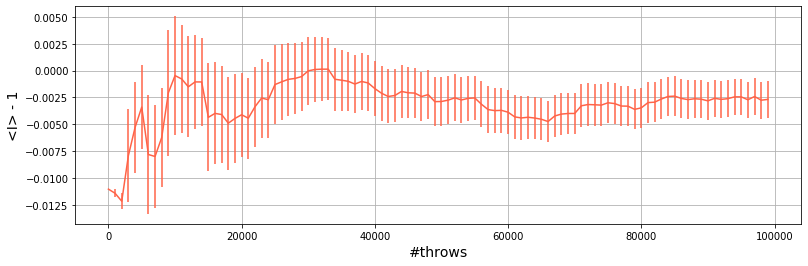

In [10]:
T = 100000 #numero di lanci
N = 100     #numero di blocchi
x = np.arange(N)
I, error  = np.loadtxt("Es01/integrale.dat", usecols=(0,1), delimiter=' ', unpack='true')

x*=int(T/N)
plt.figure(1, figsize=(13,4))
plt.errorbar(x,I - 1,yerr=error, color='tomato') 
plt.xlabel('#throws', fontsize= 14)
plt.ylabel('<I> - 1', fontsize= 14)
plt.grid(True)
plt.show()

Tramite l'uniform sampling si arriva a trovare un valore dell'integrale che si discosta dal valore atteso di -0.0025, risultando compatibile a 2$\sigma$. In prima approssimazione questo può risultare un metodo valido. 
Al 100esimo blocco $<I> = 0.99732 \pm 0.00170316$.

#### 2. using importance sampling  in $[0,1]$
Per l'importance sampling ho utilizzato la retta $ f(x) = \frac{\pi}{2}(1-x) $

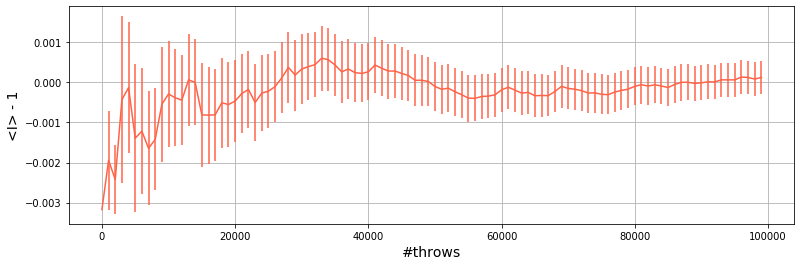

In [11]:

I2, error2  = np.loadtxt("Es01/integrale2.dat", usecols=(0,1), delimiter=' ', unpack='true')

plt.figure(1, figsize=(13,4))
plt.errorbar(x,I2 - 1,yerr=error2, color='tomato') 
plt.xlabel('#throws', fontsize= 14)
plt.ylabel('<I> - 1', fontsize= 14)
plt.grid(True)
plt.show()

Con l'importance sampling, utilizzando la retta f(x) per approssimare l'integranda di partenza, il valore dell'integrale risulta compatibile con il valore atteso. 
Al 100esimo blocco $<I> = 1.00012 \pm 0.000412325$.

### Esercizio 2.2 - 3D Random Walks (RW) on a cubic lattice and in the continuum:

#### 1. on a cubic lattice with lattice constant $a=1$:
at each discrete time the walker makes a forward or backward step of length equal to $a$ in one of the 3 principal directions of the lattice: $x$, $y$ or $z$

##### Svolgimento
Per le seguenti simulazioni sono stati eseguiti 10000 randomwalk totali, ogni randomwalk è lungo 101 passi, contando anche l'origine. Per i vari randomwalk è

Optimize parameter k=  [1.0023168]


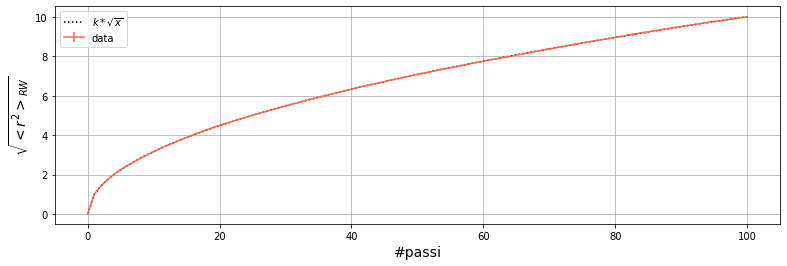

In [12]:
P = 101    #numero di passi(passo zero è l'origine)
x = np.arange(P)

r2, error  = np.loadtxt("Es02/randomwalk.dat", usecols=(0,1), delimiter=' ', unpack='true') #carico solo risultati media su tutti i blocchi

def fit_function(s,k):
    return k*np.sqrt(s)

params = optimize.curve_fit(fit_function, x, r2)

plt.figure(1, figsize=(13,4))
plt.plot(x, fit_function(x, params[0]), color='black', linestyle= 'dotted', label= '$k*\sqrt{x}$')
plt.errorbar(x, r2, yerr=error , color='tomato', label='data')
plt.xlabel('#passi',fontsize= 14)
plt.ylabel('$\sqrt{<r^2>_{RW}}$', fontsize= 14)
plt.legend(loc='best')
plt.grid(True)

print('Optimize parameter k= ',params[0])

plt.show()

In figura è raffigurato l'andamento di $\sqrt{<r^2>}$ in funzione dei passi, dove $\sqrt{<r^2>}$ è stato mediato su un totale di 10000 random walks totali utilizzando l'analisi con il metodo a blocchi su un totale di 100 blocchi.

La curva è stata fittata con una funzione $f(t) = k*\sqrt{t}$ (linea puntinata nera), ed è stato trovato un valore di $k = 1.0023168$. 

Oltre a combaciare  quasi perfettamente in figura, il valore trovato per $k$ è concorde alla teoria del Random Walk che vuole un andamento di $ <r^2(t)> = 2D*t$, dove $D = \frac{a^2}{2}$.

In questa simulazione $a = 1$ e quindi $ <r^2(t)> = t$.

Siccome gli errori sulla misura sono molto piccoli rispetto alla scala del grafico, in seguito ho riportato l'andamento della misura di $<r^2(t)>$ alla posizione finale in funzione del numero dei blocchi.  

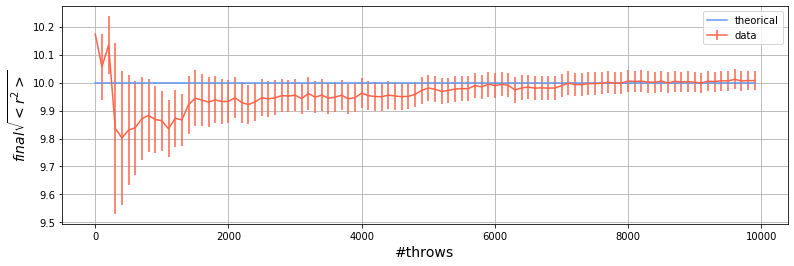

In [13]:
T = 10000 #randomwalk totali
M = 100 #blocchi
N = T/M
t = np.arange(M)
y = np.zeros(M)
d, error = np.loadtxt("Es02/finalDist.dat", usecols=(0,1), delimiter=' ', unpack='true') #carico solo media sulle distanze finali dei blocchi

t = t*N;
y = y + fit_function(x[100], 1) #valore atteso

plt.figure(1, figsize=(13,4))
plt.errorbar(t, d, yerr=error, color='tomato', label = 'data')
plt.plot(t, y, color = 'cornflowerblue', label = 'theorical')
plt.xlabel('#throws',fontsize= 14)
plt.ylabel('$final \sqrt{<r^2>}$', fontsize= 14)
plt.grid(True)
plt.legend(loc='best')
plt.show()

Si osserva che la misura di $<r^2(t)>$ converge al valore atteso dalla equazione di diffusione $<r^2(t)> = t$, in t=100.


#### 2. in the continuum:
at each discrete time the walker makes a step of length equal to $a(=1)$ along a **random direction** obtained by sampling **uniformly** the solid angle: $\theta \in [0,\pi]$ and $\phi \in [0,2\pi]$

Optimize parameter k=  [0.99975747]


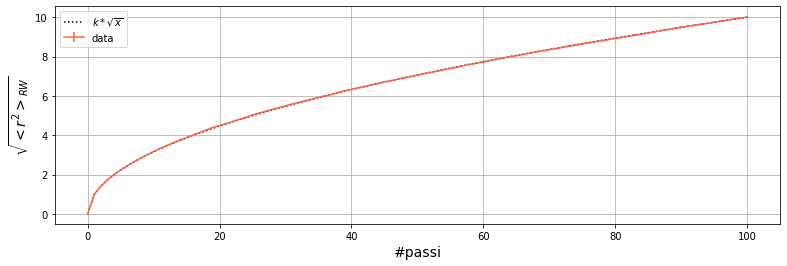

In [14]:

R2, Error  = np.loadtxt("Es02/randomwalk2.dat", usecols=(0,1), delimiter=' ', unpack='true') #carico solo risultati media su tutti i blocchi

Params = optimize.curve_fit(fit_function, x, R2)

plt.figure(1, figsize=(13,4))
plt.plot(x, fit_function(x, Params[0]), color='black', linestyle= 'dotted', label= '$k*\sqrt{x}$')
plt.errorbar(x, R2, yerr=Error , color='tomato', label='data')
plt.xlabel('#passi',fontsize= 14)
plt.ylabel('$\sqrt{<r^2>_{RW}}$', fontsize= 14)
plt.legend(loc='best')
plt.grid(True)

print('Optimize parameter k= ',Params[0])

plt.show()

In figura è raffigurato l'andamento di $\sqrt{<r^2>}$ in funzione dei passi, dove $\sqrt{<r^2>}$ è stato mediato su un totale di 10000 random walks totali utilizzando l'analisi con il metodo a blocchi su un totale di 100 blocchi.

La curva è stata fittata con una funzione $f(t) = k*\sqrt{t}$ (linea puntinata nera), ed è stato trovato un valore di $k = 0.99975747$. 

Come nel sistema precedente, la simulazione soddisfa l'equazione di diffusione $ <r^2(t)> = t$.

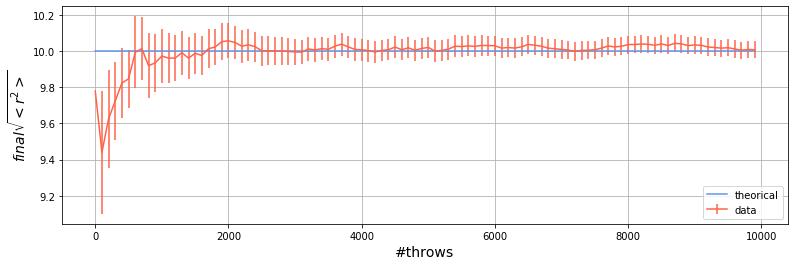

In [15]:
T = 10000 #random walks totali
M = 100 #blocchi
N = T/M
t = np.arange(M)
y = np.zeros(M)
d, error = np.loadtxt("Es02/finalDist2.dat", usecols=(0,1), delimiter=' ', unpack='true') #carico solo media sulle distanze finali dei blocchi

t = t*N;
y = y + fit_function(x[100], 1) #valore atteso

plt.figure(1, figsize=(13,4))
plt.errorbar(t, d, yerr=error, color='tomato', label = 'data')
plt.plot(t, y, color = 'cornflowerblue', label = 'theorical')
plt.xlabel('#throws',fontsize= 14)
plt.ylabel('$final \sqrt{<r^2>}$', fontsize= 14)
plt.grid(True)
plt.legend(loc='lower right')
plt.show()

Se si considera l'andamento della misura di  di $<r^2(t)>$ alla posizione finale, all'aumentare del numero dei blocchi la misura risulta convergere al valore atteso dalla equazione di diffusione $<r^2(t)> = t$, in t=100.